In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [2]:
df = pd.read_csv('steam.csv')
df.head(5)

,Unnamed: 0,recommendationid,author,review,timestamp_created,timestamp_updated,voted_up,votes_up,weighted_vote_score,app_id,title,date_release,rating,positive_ratio,user_reviews,price_final,price_original,os
0,0,158405309,76561198386493444,banger ost,2024-02-16 06:37:04,2024-02-16 06:37:04,True,7,0.608349,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,9.99,w
1,1,158511191,76561198863061889,The Good:\n\nSountracks in this game absolutel...,2024-02-17 16:05:22,2024-02-17 16:05:22,True,6,0.592803,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,9.99,w
2,2,159766660,76561198984533374,Relived my childhood! One can play this game 1...,2024-03-03 20:25:18,2024-03-03 20:25:18,True,5,0.561698,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,9.99,w
3,3,159360393,76561198328052404,This game's standout platforming elements are ...,2024-02-27 08:58:55,2024-02-27 08:58:55,False,4,0.538689,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,9.99,w
4,4,158872020,76561198083872400,He's literally me before literally me existed,2024-02-21 15:22:46,2024-02-21 15:22:46,True,4,0.526532,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,9.99,w


In [3]:
df.shape

(417129, 18)

In [4]:
df.dtypes

Unnamed: 0               int64
recommendationid         int64
author                   int64
review                  object
timestamp_created       object
timestamp_updated       object
voted_up                  bool
votes_up                 int64
weighted_vote_score    float64
app_id                   int64
title                   object
date_release            object
rating                  object
positive_ratio           int64
user_reviews             int64
price_final            float64
price_original         float64
os                      object
dtype: object

In [5]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'])
df['timestamp_updated'] = pd.to_datetime(df['timestamp_updated'])
df['date_release'] = pd.to_datetime(df['date_release'])

In [6]:
df.describe()

,Unnamed: 0,recommendationid,author,timestamp_created,timestamp_updated,votes_up,weighted_vote_score,app_id,date_release,positive_ratio,user_reviews,price_final,price_original
count,417129.000000,4.171290e+05,4.171290e+05,417129,417129,417129.000000,417129.000000,4.171290e+05,417129,417129.000000,4.171290e+05,417129.000000,417129.000000
mean,212199.704022,8.296522e+07,7.656120e+16,2020-05-31 01:48:06.514752,2020-06-23 13:44:43.978364416,10.425147,0.463694,9.233377e+05,2018-08-06 22:10:00.418575360,75.684910,3.134569e+03,9.544409,9.308105
min,0.000000,5.340000e+02,7.656120e+16,2010-11-20 01:15:28,2010-11-20 01:15:28,0.000000,0.000000,1.000000e+01,1997-06-30 00:00:00,0.000000,1.000000e+01,0.000000,0.000000
25%,106976.000000,4.057860e+07,7.656120e+16,2018-03-05 12:31:40,2018-04-10 17:56:08,1.000000,0.464845,4.394400e+05,2016-08-02 00:00:00,65.000000,2.200000e+01,2.990000,2.990000
50%,212803.000000,7.900660e+07,7.656120e+16,2020-11-10 01:39:05,2020-12-02 02:53:09,3.000000,0.523810,8.019800e+05,2018-10-02 00:00:00,80.000000,4.700000e+01,5.990000,5.990000
75%,317606.000000,1.235212e+08,7.656120e+16,2022-10-08 14:38:56,2022-10-28 07:15:58,8.000000,0.575915,1.329470e+06,2021-02-17 00:00:00,90.000000,1.370000e+02,12.990000,11.990000
max,422681.000000,1.605885e+08,7.656120e+16,2024-03-15 22:37:14,2024-03-15 22:37:14,15609.000000,0.990941,2.599300e+06,2023-10-24 00:00:00,100.000000,7.494460e+06,299.990000,299.990000
std,121855.404284,4.725394e+07,3.587441e+08,NaN,NaN,50.302021,0.224299,5.742034e+05,NaN,18.558881,6.032357e+04,11.184849,10.753683


In [8]:
#check for duplicate values
number_of_duplicaes = df.duplicated().sum()
print('number of duplicated rows is {}'.format(number_of_duplicaes) )

number of duplicated rows is 0


In [9]:
# check for missing data
# the whole dataset: find out the percentgae of values missing
total_missing_percentage = df.isnull().sum() * 100 / len(df)
total_missing_percentage

Unnamed: 0             0.000000
recommendationid       0.000000
author                 0.000000
review                 0.046508
timestamp_created      0.000000
timestamp_updated      0.000000
voted_up               0.000000
votes_up               0.000000
weighted_vote_score    0.000000
app_id                 0.000000
title                  0.000000
date_release           0.000000
rating                 0.000000
positive_ratio         0.000000
user_reviews           0.000000
price_final            0.000000
price_original         0.000000
os                     0.000000
dtype: float64

In [10]:
df.loc[df.review.isna()]

,Unnamed: 0,recommendationid,author,review,timestamp_created,timestamp_updated,voted_up,votes_up,weighted_vote_score,app_id,title,date_release,rating,positive_ratio,user_reviews,price_final,price_original,os
4750,4878,156699091,76561198313069485,NaN,2024-01-24 21:14:52,2024-01-24 21:14:52,True,0,0.000000,1425130,Forgotten Hill First Steps,2021-06-10,Very Positive,96,78,2.99,2.99,wm
4801,4929,157927711,76561198313069485,NaN,2024-02-09 22:52:24,2024-02-09 22:52:24,True,0,0.000000,1926170,Forgotten Hill Tales,2022-04-27,Positive,88,45,2.99,2.99,wm
5703,5833,139499965,76561199124506991,NaN,2023-06-04 04:10:21,2023-06-04 04:10:21,True,0,0.000000,2233890,Prison Wars,2023-01-06,Positive,92,14,1.99,1.99,w
8427,8675,106992280,76561198002178416,NaN,2022-01-01 00:09:06,2022-01-01 00:09:06,True,0,0.469214,437690,Venture Kid,2018-05-03,Very Positive,84,135,9.99,9.99,w
12474,12784,147435197,76561198860180717,NaN,2023-10-01 21:40:38,2023-10-01 21:40:38,True,0,0.000000,1584690,TrinityS,2022-04-27,Very Positive,82,98,14.99,14.99,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407129,412589,160248325,76561199588255621,NaN,2024-03-10 17:29:18,2024-03-10 17:29:18,True,1,0.523810,1594940,Little Witch in the Woods,2022-05-16,Very Positive,91,5470,15.99,15.99,wm
410196,415659,141172607,76561198110729074,NaN,2023-07-03 06:46:01,2023-07-03 06:46:01,True,2,0.473407,1515020,Kingsblood,2023-06-21,Positive,100,19,14.99,14.99,wl
412127,417615,137852992,76561198096538664,NaN,2023-05-06 07:32:08,2023-05-06 07:32:08,True,1,0.451128,2346890,Bananaguy,2023-05-05,Positive,100,12,2.79,3.99,w
414027,419552,155547032,76561199209470740,NaN,2024-01-08 19:09:09,2024-03-04 19:37:58,True,0,0.000000,393330,Typing Instructor for Kids Platinum 5,2016-01-26,Positive,80,10,2.59,3.99,w


In [11]:
#fill na values with ''
df = df.fillna('')

**EDA**

In [12]:
print(f'number of users commented: {df.author.nunique()}')

number of users commented: 265561


In [13]:
print(f'number of games in comments: {df.app_id.nunique()}')

number of games in comments: 43299


In [14]:
cat_col = ['rating', 'os']
for col in cat_col:
    print(df[col].value_counts())
    print('\n')

rating
Mixed                      109844
Positive                   109196
Very Positive               94975
Mostly Positive             74865
Mostly Negative             16811
Overwhelmingly Positive      7666
Negative                     2849
Very Negative                 882
Overwhelmingly Negative        41
Name: count, dtype: int64


os
w      286223
wml     71528
wm      47156
wl      12201
l          20
ml          1
Name: count, dtype: int64




In [15]:
df.columns

Index(['Unnamed: 0', 'recommendationid', 'author', 'review',
       'timestamp_created', 'timestamp_updated', 'voted_up', 'votes_up',
       'weighted_vote_score', 'app_id', 'title', 'date_release', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'os'],
      dtype='object')

In [16]:
df['time_between_comment_and_game'] = df['timestamp_created'] - df['date_release']
df['days_between_comment_and_game'] = df['time_between_comment_and_game'].dt.days
df

,Unnamed: 0,recommendationid,author,review,timestamp_created,timestamp_updated,voted_up,votes_up,weighted_vote_score,app_id,title,date_release,rating,positive_ratio,user_reviews,price_final,price_original,os,time_between_comment_and_game,days_between_comment_and_game
0,0,158405309,76561198386493444,banger ost,2024-02-16 06:37:04,2024-02-16 06:37:04,True,7,0.608349,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,9.99,w,5565 days 06:37:04,5565
1,1,158511191,76561198863061889,The Good:\n\nSountracks in this game absolutel...,2024-02-17 16:05:22,2024-02-17 16:05:22,True,6,0.592803,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,9.99,w,5566 days 16:05:22,5566
2,2,159766660,76561198984533374,Relived my childhood! One can play this game 1...,2024-03-03 20:25:18,2024-03-03 20:25:18,True,5,0.561698,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,9.99,w,5581 days 20:25:18,5581
3,3,159360393,76561198328052404,This game's standout platforming elements are ...,2024-02-27 08:58:55,2024-02-27 08:58:55,False,4,0.538689,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,9.99,w,5576 days 08:58:55,5576
4,4,158872020,76561198083872400,He's literally me before literally me existed,2024-02-21 15:22:46,2024-02-21 15:22:46,True,4,0.526532,13500,Prince of Persia: Warrior Within™,2008-11-21,Very Positive,84,2199,9.99,9.99,w,5570 days 15:22:46,5570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417124,422677,156941025,76561198157392394,Lovecraftian FPS sequel game good. Better than...,2024-01-27 19:18:41,2024-01-27 19:18:41,True,2,0.512195,2272250,Forgive Me Father 2,2023-10-19,Very Positive,95,82,17.00,0.00,w,100 days 19:18:41,100
417125,422678,157149584,76561198413366286,"This is a big step up from the original, but d...",2024-01-30 06:36:33,2024-01-30 06:36:33,True,1,0.500000,2272250,Forgive Me Father 2,2023-10-19,Very Positive,95,82,17.00,0.00,w,103 days 06:36:33,103
417126,422679,159446977,76561197999394473,A fantastic base of a game that is sorely miss...,2024-02-28 12:21:26,2024-02-28 12:21:26,False,3,0.565881,2488510,FatalZone,2023-10-23,Very Positive,88,144,4.00,0.00,w,128 days 12:21:26,128
417127,422680,160071442,76561197971053601,"Game play loop is fun, but it kind of stinks t...",2024-03-08 08:53:45,2024-03-08 08:53:45,True,1,0.516484,2488510,FatalZone,2023-10-23,Very Positive,88,144,4.00,0.00,w,137 days 08:53:45,137


In [17]:
rating_to_num_dict = {'Mixed': 0, 'Mostly Positive': 1, 'Positive': 2, 'Very Positive' : 3, 'Overwhelmingly Positive': 4, 
               'Mostly Negative': -1, 'Negative': -2, 'Very Negative' : -3, 'Overwhelmingly Negative': -4}
rating_simplify_dict = {'Mixed': 'Mixed', 'Mostly Positive': 'Positive', 'Positive': 'Positive', 'Very Positive' : 'Positive', 'Overwhelmingly Positive': 'Positive', 
               'Mostly Negative': 'Negative', 'Negative': 'Negative', 'Very Negative' : 'Negative', 'Overwhelmingly Negative': 'Negative'}
df['rating_numerical'] = df['rating'].map(rating_to_num_dict)
df['rating_simplified'] = df['rating'].map(rating_simplify_dict)

In [18]:
df.columns

Index(['Unnamed: 0', 'recommendationid', 'author', 'review',
       'timestamp_created', 'timestamp_updated', 'voted_up', 'votes_up',
       'weighted_vote_score', 'app_id', 'title', 'date_release', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original', 'os',
       'time_between_comment_and_game', 'days_between_comment_and_game',
       'rating_numerical', 'rating_simplified'],
      dtype='object')

In [19]:
numerical_col = ['voted_up', 'votes_up',  'weighted_vote_score', 'positive_ratio', 'user_reviews','price_final', 'price_original',  'days_between_comment_and_game', 'rating_numerical']

<Axes: >

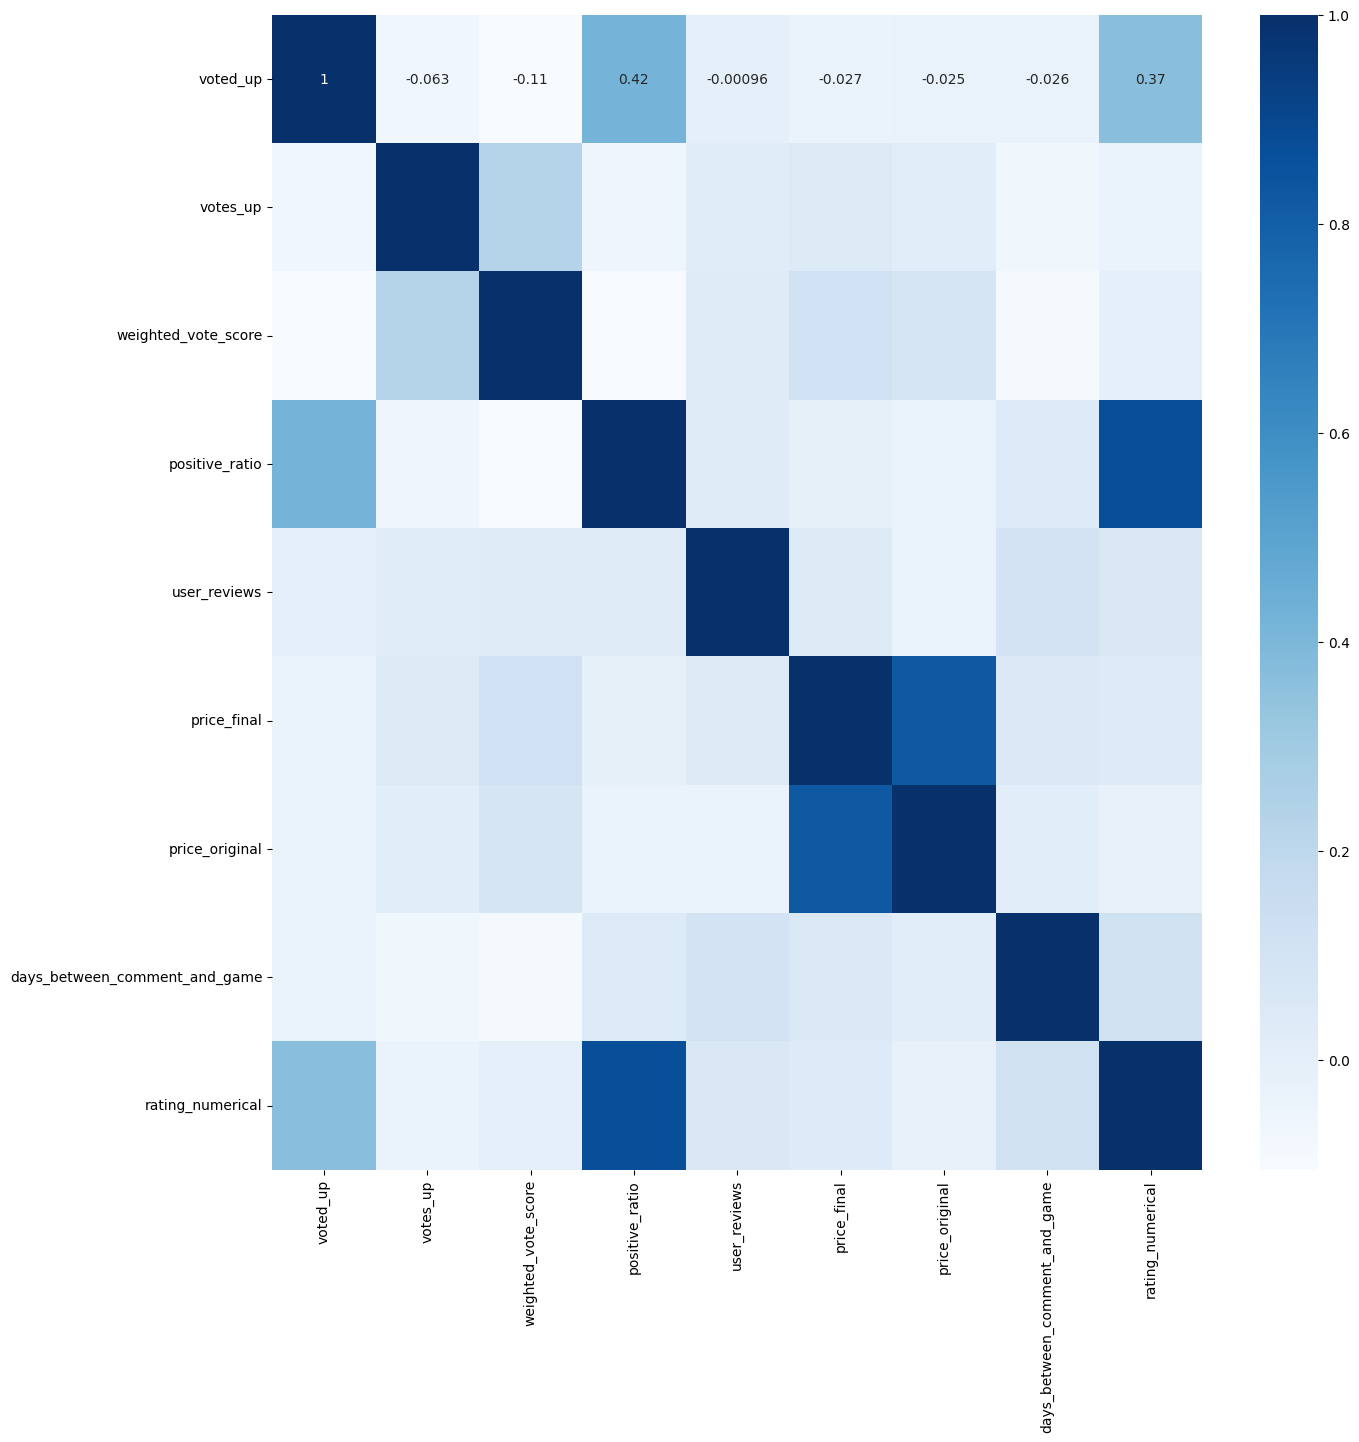

In [20]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(data=df[numerical_col].corr(), cmap='Blues', ax = ax, fmt='.2g', annot = True)

In [22]:
df[numerical_col].corr()

,voted_up,votes_up,weighted_vote_score,positive_ratio,user_reviews,price_final,price_original,days_between_comment_and_game,rating_numerical
voted_up,1.000000,-0.062807,-0.105025,0.421151,-0.000965,-0.027494,-0.024582,-0.026147,0.366351
votes_up,-0.062807,1.000000,0.230608,-0.054062,0.023822,0.042128,0.019497,-0.059665,-0.030853
weighted_vote_score,-0.105025,0.230608,1.000000,-0.100008,0.029162,0.121530,0.084842,-0.087334,-0.001180
positive_ratio,0.421151,-0.054062,-0.100008,1.000000,0.030783,-0.008904,-0.033615,0.037617,0.871991
user_reviews,-0.000965,0.023822,0.029162,0.030783,1.000000,0.044996,-0.028268,0.099681,0.058638
price_final,-0.027494,0.042128,0.121530,-0.008904,0.044996,1.000000,0.826156,0.051593,0.037504
price_original,-0.024582,0.019497,0.084842,-0.033615,-0.028268,0.826156,1.000000,0.015934,-0.020248
days_between_comment_and_game,-0.026147,-0.059665,-0.087334,0.037617,0.099681,0.051593,0.015934,1.000000,0.115747
rating_numerical,0.366351,-0.030853,-0.001180,0.871991,0.058638,0.037504,-0.020248,0.115747,1.000000


Text(0.5, 1.0, 'Distribution of rating by os')

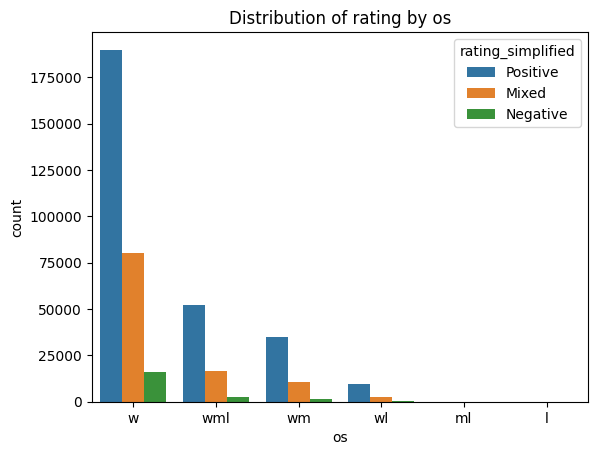

In [21]:
sns.countplot(x='os', data=df, hue='rating_simplified') 
plt.title('Distribution of rating by os')

In [24]:
df.to_csv('../Recommendation/collaborative recommender/steam_transformed.csv')